In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
mydaters = pd.read_csv("C:\\Users\\roons\\Downloads\\scammer_large_dataset\\New_Datasets\\Verified_Non_Scammers\\user_prompt_nonscammer.csv")

In [3]:
myscammers = pd.read_csv("C:\\Users\\roons\\Downloads\\scammer_large_dataset\\New_Datasets\\Scammers\\user_prompt_scammer.csv")

In [4]:
mydaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4911 entries, 0 to 4910
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          4852 non-null   object 
 1   user_id     4711 non-null   object 
 2   prompt_id   4686 non-null   object 
 3   text        4258 non-null   object 
 4   created_at  4631 non-null   object 
 5   deleted_at  4149 non-null   object 
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  14 non-null     object 
 8   Unnamed: 8  9 non-null      object 
 9   Unnamed: 9  4 non-null      object 
dtypes: float64(1), object(9)
memory usage: 383.8+ KB


In [5]:
myscammers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          821 non-null    object 
 1   user_id     817 non-null    object 
 2   prompt_id   816 non-null    object 
 3   text        703 non-null    object 
 4   created_at  813 non-null    object 
 5   deleted_at  351 non-null    object 
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 45.0+ KB


In [6]:
mydaters["scammer"] = "No"

In [7]:
myscammers["scammer"] = "Yes"

In [8]:
mydata = pd.concat([mydaters, myscammers], ignore_index=True)

In [9]:
mydata.head()

,id,user_id,prompt_id,text,created_at,deleted_at,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,scammer
0,33100,3893,1,Looking for a ski buddy❄️,12/30/2016 8:09,8/20/2017 4:04,NaN,NaN,NaN,NaN,No
1,324742,3893,1,if you ready come and get it,8/20/2017 4:04,10/29/2017 1:11,NaN,NaN,NaN,NaN,No
2,475790,3893,1,NaN,10/29/2017 1:12,1/6/2019 17:53,NaN,NaN,NaN,NaN,No
3,1663014,3893,1,I love all things outside,1/6/2019 17:53,NaN,NaN,NaN,NaN,NaN,No
4,4825,5099,1,I love being active by playing sports or hikin...,7/31/2016 20:58,12/14/2018 16:39,NaN,NaN,NaN,NaN,No


In [10]:
mydata.tail()

,id,user_id,prompt_id,text,created_at,deleted_at,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,scammer
5727,4641873,1202716,1,I'm Joseph by name cool and lovely man ❤️❤️,2/7/2021 21:15,NaN,NaN,NaN,NaN,NaN,Yes
5728,4652553,1205106,1,NaN,2/10/2021 7:50,2/10/2021 7:54,NaN,NaN,NaN,NaN,Yes
5729,4652559,1205106,1,Am simple and down to earth ... Looking for a ...,2/10/2021 7:54,2/10/2021 21:15,NaN,NaN,NaN,NaN,Yes
5730,4653824,1205106,1,Am simple and down to earth ... Looking for a ...,2/10/2021 21:15,NaN,NaN,NaN,NaN,NaN,Yes
5731,4660991,1206746,1,NaN,2/12/2021 21:59,NaN,NaN,NaN,NaN,NaN,Yes


In [11]:
mydata.head()
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5673 non-null   object 
 1   user_id     5528 non-null   object 
 2   prompt_id   5502 non-null   object 
 3   text        4961 non-null   object 
 4   created_at  5444 non-null   object 
 5   deleted_at  4500 non-null   object 
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  14 non-null     object 
 8   Unnamed: 8  9 non-null      object 
 9   Unnamed: 9  4 non-null      object 
 10  scammer     5732 non-null   object 
dtypes: float64(1), object(10)
memory usage: 492.7+ KB


In [12]:
mydata = mydata[["id","user_id","text", "created_at","deleted_at", "scammer"]]

In [13]:
mydata.dropna(inplace=True, subset=['text'])
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 5730
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4961 non-null   object
 1   user_id     4961 non-null   object
 2   text        4961 non-null   object
 3   created_at  4916 non-null   object
 4   deleted_at  4051 non-null   object
 5   scammer     4961 non-null   object
dtypes: object(6)
memory usage: 271.3+ KB


In [14]:
#some ID values are not numeric... might need to look into that
mydata.id.value_counts()

#NAME?                          5
I will tell a punny dad joke    4
(she's my niece                 2
1840870                         1
3872430                         1
                               ..
4462578                         1
4113621                         1
3133428                         1
4208996                         1
1402886                         1
Name: id, Length: 4953, dtype: int64

## Exploring Length of Prompts

In [15]:
mydata["wordcount"] = mydata["text"].apply(lambda x: len(x.split()))

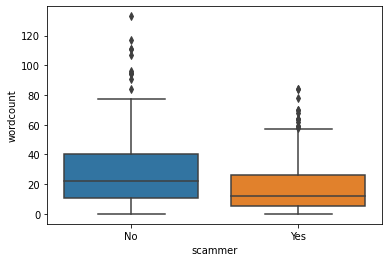

In [16]:
sns.boxplot(x='scammer', y='wordcount',data=mydata)

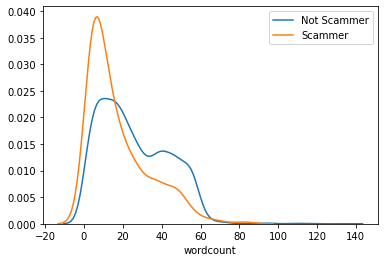

In [17]:
sns.distplot(mydata[mydata['scammer']=="No"].wordcount, hist=False, kde=True, label="Not Scammer")
sns.distplot(mydata[mydata['scammer']=="Yes"].wordcount, hist=False, kde = True, label="Scammer")

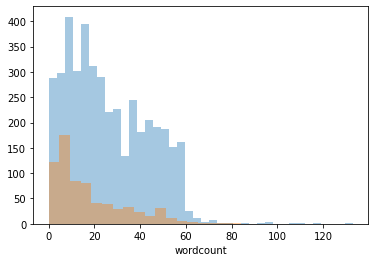

In [18]:
sns.distplot(mydata[mydata['scammer']=="No"].wordcount, kde=False, label="Not Scammer")
sns.distplot(mydata[mydata['scammer']=="Yes"].wordcount, kde = False, label="Scammer")

## SENTIMENT ANALYSIS

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
sid = SentimentIntensityAnalyzer()

In [21]:
mydata['scores'] = mydata['text'].apply(lambda x: sid.polarity_scores(x))

In [22]:
mydata['compound'] = mydata['scores'].apply(lambda x: x['compound'])

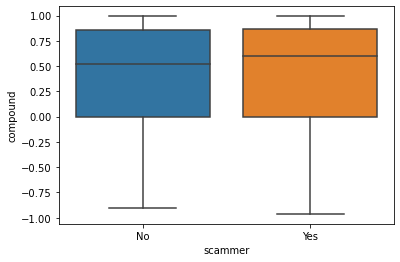

In [23]:
sns.boxplot(x='scammer', y='compound',data=mydata)

## ADDING TOPIC LDA

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [26]:
dtm = cv.fit_transform(mydata['text'])

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
LDA = LatentDirichletAllocation(n_components=5,random_state=42)

In [29]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [30]:
len(cv.get_feature_names())

4058

In [31]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-5:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['people', 'love', 'looking', 'like', 'just']


THE TOP 15 WORDS FOR TOPIC #1
['little', 'don', 'life', 'want', 'like']


THE TOP 15 WORDS FOR TOPIC #2
['fun', 'enjoy', 'new', 'good', 'love']


THE TOP 15 WORDS FOR TOPIC #3
['loyal', 'healthy', 'romantic', 'dancing', 'love']


THE TOP 15 WORDS FOR TOPIC #4
['ask', 'know', 'insta', 'just', 'like']




In [32]:
topic_results = LDA.transform(dtm)

In [33]:
mydata['Topic'] = topic_results.argmax(axis=1)

In [34]:
mydata['Topic'].value_counts()

2    1377
0    1044
4     973
1     890
3     677
Name: Topic, dtype: int64

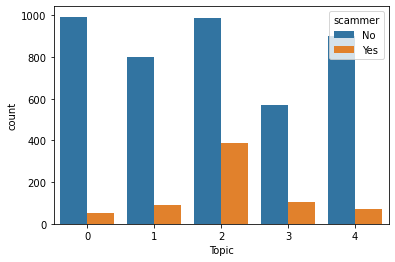

In [35]:
sns.countplot(x="Topic", hue="scammer", data=mydata)

In [36]:
freq = pd.crosstab(mydata["Topic"],mydata["scammer"])

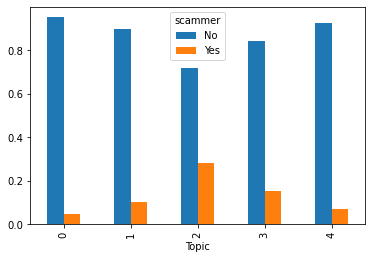

In [37]:
relative = freq.div(freq.sum(axis=1), axis=0)
relative.plot(kind="bar")

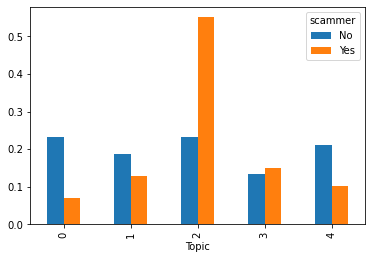

In [38]:
relative = freq.div(freq.sum(axis=0), axis=1)
relative.plot(kind="bar")

## TFIDF Work

In [39]:
y = mydata["scammer"]
X = mydata["text"]

In [40]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 5730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          4961 non-null   object 
 1   user_id     4961 non-null   object 
 2   text        4961 non-null   object 
 3   created_at  4916 non-null   object 
 4   deleted_at  4051 non-null   object 
 5   scammer     4961 non-null   object 
 6   wordcount   4961 non-null   int64  
 7   scores      4961 non-null   object 
 8   compound    4961 non-null   float64
 9   Topic       4961 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 586.3+ KB


In [41]:
#mydata.pop('text')

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = TfidfVectorizer(sublinear_tf=False, max_df=0.95, min_df=30, analyzer='word', stop_words='english', )

X = vect.fit_transform(mydata.pop('text')).toarray()

for i, col in enumerate(vect.get_feature_names()):
    mydata[col] = X[:, i]

In [43]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 5730
Columns: 394 entries, id to zero
dtypes: float64(386), int64(2), object(6)
memory usage: 15.1+ MB


In [44]:
mydata

,id,user_id,created_at,deleted_at,scammer,wordcount,scores,compound,Topic,10,...,words,work,working,works,world,year,years,yes,young,zero
0,33100,3893,12/30/2016 8:09,8/20/2017 4:04,No,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,324742,3893,8/20/2017 4:04,10/29/2017 1:11,No,7,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.3612,4,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,1663014,3893,1/6/2019 17:53,NaN,No,5,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.6369,1,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,4825,5099,7/31/2016 20:58,12/14/2018 16:39,No,38,"{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9705,2,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,1575486,5099,12/14/2018 16:39,1/20/2019 22:29,No,38,"{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9705,2,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,4638172,1201743,2/7/2021 0:34,NaN,Yes,5,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.3182,2,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.595103,0.0
5726,4640473,1202334,2/7/2021 13:31,NaN,Yes,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,0.0,...,0.0,0.0,0.0,0.0,0.548535,0.0,0.0,0.0,0.000000,0.0
5727,4641873,1202716,2/7/2021 21:15,NaN,Yes,9,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...",0.7269,2,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5729,4652559,1205106,2/10/2021 7:54,2/10/2021 21:15,Yes,26,"{'neg': 0.045, 'neu': 0.616, 'pos': 0.339, 'co...",0.8625,3,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [45]:
mydata.to_csv("cleanedpromptALL.csv")